In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import h5py
import scipy 
import sys 

sys.path.append("../lib")
from figparams import *
plt.rcParams.update(rc_params)

from matplotlib.legend_handler import HandlerBase
class AnyObjectHandler(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       x0, y0, width, height, fontsize, trans):
        c = orig_handle.get_color()
        l1 = plt.Line2D([x0,y0+width], [1.0*height,1.0*height],
                         color=c, ls="-")
        l2 = plt.Line2D([x0,y0+width], [0.5*height,0.5*height], 
                           color=c, ls="--")
        l3 = plt.Line2D([x0,y0+width], [0.0*height,0.0*height],
                         color=c, ls=":")
        return [l1, l2, l3]



In [2]:
 # Read super back 
data = h5py.File("../data/dataFigure8.h5", "r")

SNR3cosi1 = data["SNR3cosi1"][()]
SNR3cosi0 = data["SNR3cosi0"][()]
SNR3cosi07 = data["SNR3cosi07"][()]
SNR10cosi1 = data["SNR10cosi1"][()]
SNR10cosi0 = data["SNR10cosi0"][()]
SNR10cosi07 = data["SNR10cosi07"][()]
SNR20cosi1 = data["SNR20cosi1"][()]
SNR20cosi0 = data["SNR20cosi0"][()]
SNR20cosi07 = data["SNR20cosi07"][()]

ls = ["$\iota=\pi/2$","$\iota=\pi/4$","$\iota=0$"]

SNRs = {}
MCDs = {}
Zs = {}

for l in ls: 
    SNRs[l] = data[f"SNR_{l}"][()]
    MCDs[l] = data[f"MCD_{l}"][()]
    Zs[l] = data[f"Z_{l}"][()]
    
# Read MCLISA and ZLISA
MCLISA = data["MCLISA"][()]
ZLISA = data["ZLISA"][()]
data.close()

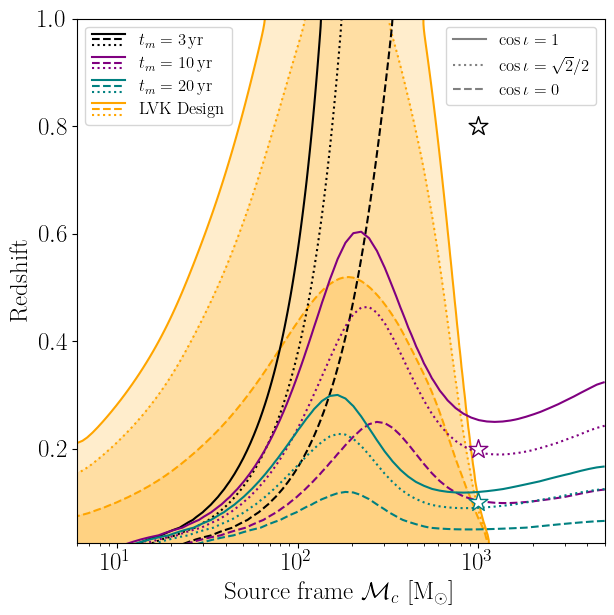

In [3]:
plt.figure(figsize=square_size)
plt.xscale('log')

ls = ["$\iota=\pi/2$","$\iota=\pi/4$","$\iota=0$"]
levels = [8]
lines = []

for iota, ls in zip(ls,["dashed", 
                        "dotted",
                        "solid"]):
    MCD = MCDs[iota]
    Z = Zs[iota]
    smoothMYSNRs = scipy.ndimage.gaussian_filter(SNRs[iota].reshape(100,100), sigma=2., order=0)    
    plt.contourf(MCD, Z, smoothMYSNRs, levels = [14,1000000], linestyles=ls, colors="orange", alpha=0.2)
    plt.contour(MCD, Z, smoothMYSNRs, levels = [14,1000000], linestyles=ls, colors="orange")

plt.scatter([1000.,],[0.1], s=200, c="white", edgecolor="teal", zorder=10, marker="*")
plt.scatter([1000.,],[0.2], s=200, c="white", edgecolor="purple", zorder=10, marker="*")
plt.scatter([1000.,],[0.8], s=200, c="white", edgecolor="black", zorder=10, marker="*")


SNRsmooth3cosi1 = scipy.ndimage.gaussian_filter(SNR3cosi1.reshape(70,70), sigma=1.)
SNRsmooth3cosi0 = scipy.ndimage.gaussian_filter(SNR3cosi0.reshape(70,70), sigma=1.)
SNRsmooth3cosi07 = scipy.ndimage.gaussian_filter(SNR3cosi07.reshape(70,70), sigma=1.)

plt.contour(MCLISA, ZLISA, SNRsmooth3cosi1, levels=levels, colors='k', linestyles='solid')
plt.contour(MCLISA, ZLISA, SNRsmooth3cosi0, levels=levels, colors='k', linestyles='dashed')
plt.contour(MCLISA, ZLISA, SNRsmooth3cosi07, levels=levels, colors='k', linestyles='dotted')
solid_line3 = mlines.Line2D([], [], color='black', linestyle='solid', label='$t_m=3 {\,\\rm yr}$')

SNRsmooth10cosi1 = scipy.ndimage.gaussian_filter(SNR10cosi1.reshape(70,70), sigma=1.)
SNRsmooth10cosi0 = scipy.ndimage.gaussian_filter(SNR10cosi0.reshape(70,70), sigma=1.)
SNRsmooth10cosi07 = scipy.ndimage.gaussian_filter(SNR10cosi07.reshape(70,70), sigma=1.)

plt.contour(MCLISA, ZLISA, SNRsmooth10cosi1, levels=levels, colors='purple', linestyles='solid')
plt.contour(MCLISA, ZLISA, SNRsmooth10cosi0, levels=levels, colors='purple', linestyles='dashed')
plt.contour(MCLISA, ZLISA, SNRsmooth10cosi07, levels=levels, colors='purple', linestyles='dotted')
solid_line10 = mlines.Line2D([], [], color='purple', linestyle='solid', label='$t_m=10 {\,\\rm yr}$')

SNRsmooth20cosi1 = scipy.ndimage.gaussian_filter(SNR20cosi1.reshape(70,70), sigma=1.)
SNRsmooth20cosi0 = scipy.ndimage.gaussian_filter(SNR20cosi0.reshape(70,70), sigma=1.)
SNRsmooth20cosi07 = scipy.ndimage.gaussian_filter(SNR20cosi07.reshape(70,70), sigma=1.)

plt.contour(MCLISA, ZLISA, SNRsmooth20cosi1, levels=levels, colors='teal', linestyles='solid')
plt.contour(MCLISA, ZLISA, SNRsmooth20cosi0, levels=levels, colors='teal', linestyles='dashed')
plt.contour(MCLISA, ZLISA, SNRsmooth20cosi07, levels=levels, colors='teal', linestyles='dotted')

solid_line20 = mlines.Line2D([], [], color='teal', linestyle='solid', label='$t_m=20 {\,\\rm yr}$')
solid_line300 = mlines.Line2D([], [], color='orange', linestyle='solid', label='LVK Design')

handles = [solid_line3, 
           solid_line10,
           solid_line20,
           solid_line300]

labels= ['$t_m=3 {\,\\rm yr}$', 
         '$t_m=10 {\,\\rm yr}$',
         '$t_m=20 {\,\\rm yr}$',
         'LVK Design'
         ]

ax = plt.gca()
legen = ax.legend(handles, labels, handler_map={plt.Line2D: AnyObjectHandler()}, fontsize=12, loc="upper left")
ax.add_artist(legen)

linec = [mlines.Line2D([], [], color='gray', linestyle='solid', label='$\cos\iota=1$'),
         mlines.Line2D([], [], color='gray', linestyle='dotted', label='$\cos\iota=\sqrt{2}/2$'),
         mlines.Line2D([], [], color='gray', linestyle='dashed', label='$\cos\iota=0$')]
 
plt.legend(handles=linec, fontsize=12, loc="upper right")
plt.xlabel("Source frame $\mathcal{M}_c$ [M$_\odot$]")
plt.ylabel("Redshift")
plt.xlim(6,5000)
plt.ylim(0.025,1)
plt.savefig("../plots/Figure8.pdf", bbox_inches='tight')
    